# Exploratory Data Analysis on Netflix Dataset

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [180]:
pd.reset_option('display.max_colwidth')

In [181]:
data = pd.read_csv(r"D:\Backup Folder\eda practice\Netflix Data Set\archive\netflix_titles_2021.csv")

In [182]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Basic Data Operation

In [183]:
colors = [
    "#FF6F91",  # Flamingo Pink
    "#FFD700",  # Gold
    "#4ECDC4",  # Mint
    "#FF9F1C",  # Sunflower
    "#9B59B6",  # Amethyst
    "#3498DB",  # Curious Blue
    "#F368E0",  # Orchid Pink
    "#45B39D",  # Sea Green
    "#F9CA24",  # Goldenrod
    "#FFD580",  # Apricot
    "#65F1C9"   # Mint Green
]

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [185]:
(data.isnull().sum() / len(data))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## &#128373;&#8205;&#9792; The data contains null values and we need to handle them first

In [186]:
data.duplicated().sum()

0

## &#128373;&#8205;&#9792; There are no duplicate entries within the dataset

## 1.1. rating

In [187]:
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## Lets check out the meaning of each of this content rating 

In [188]:
content_ratings = {
    'PG-13': 'Parents Strongly Cautioned – Some material may be inappropriate for children under 13',
    'TV-MA': 'Mature Audience Only – This program is specifically designed to be viewed by adults and may be unsuitable for children under 17',
    'PG': 'Parental Guidance Suggested – Some material may not be suitable for children',
    'TV-14': 'Parents Strongly Cautioned – Some material may be inappropriate for children under 14',
    'TV-PG': 'Parental Guidance Suggested – Some material may not be suitable for children',
    'TV-Y': 'All Children – This program is designed to be appropriate for all children',
    'TV-Y7': 'Directed to Older Children – This program is designed for children age 7 and above',
    'R': 'Restricted – Restricted to viewers over the age of 17',
    'TV-G': 'General Audience – This program is suitable for all ages',
    'G': 'General Audience – All ages are admitted',
    'NC-17': 'Adults Only – No one 17 and under admitted',
    '74 min': 'Runtime of 74 minutes',
    '84 min': 'Runtime of 84 minutes',
    '66 min': 'Runtime of 66 minutes',
    'NR': 'Not Rated – The content rating is not specified',
    'TV-Y7-FV': 'Directed to Older Children (Fantasy Violence) – This program is designed for children age 7 and above and may contain fantasy violence',
    'UR': 'Unrated – The content has not been rated or the rating is unknown'
}


## Given that both null values and "UR" have the same meaning, we can proceed to replace the missing values in the Rating column with "UR"

In [189]:
data["rating"].fillna("UR", inplace = True)

In [190]:
data[data["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# 1.2. duration

In [191]:
data["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

##  For further analysis, it would be beneficial to separate the "Seasons" and "Duration" into two distinct columns. This separation will allow us to examine and analyze these variables independently.  This segregation of data will provide a more detailed understanding of the TV shows and movies in the dataset.

In [192]:
def correct_duration(data):
    try:
        if data.split(" ")[-1] == "min":
            return(int(data.split(" ")[0]))
        else:
            return np.nan
    except:
        return np.nan
data["movie_duration"] = data["duration"].apply(correct_duration)

In [193]:
data[(data["movie_duration"].isnull()) & (data["type"] == "Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,NaN


In [194]:
data["movie_duration"].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_duration, dtype: float64

## Considering the relatively close values of the mean and median movie durations, it can be inferred that the dataset does not contains outliers. Therefore, we can confidently use the mean value to replace the null movie durations in the dataset. 

In [195]:
data.loc[(data["movie_duration"].isnull()) & (data["type"] == "Movie"), "movie_duration"] =  np.mean(data["movie_duration"])

## Since the movie_duration is irrelevant for TV shows, it is reasonable to replace the NaN values in the movie_duration column with 0.

In [196]:
data.loc[(data["movie_duration"].isnull()) & (data["type"] == "TV Show"), "movie_duration"] =  0

## Let's check whether all replacements have correctly been made or not

In [197]:
data[(data["movie_duration"] == 0) & (data["type"] == "Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration


In [198]:
data[(data["movie_duration"].isnull()) & (data["type"] == "Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration


In [199]:
data[(data["movie_duration"].isnull()) & (data["type"] == "TV Show")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration


In [200]:
data[~(data["movie_duration"] == 0) & (data["type"] == "TV Show")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration


In [201]:
def count_season(data):
    try:
        if data.split(" ")[-1] in ["Seasons", "Season"]:
            return int(data.split(" ")[0])
        else:
            return np.nan
    except:
        return np.nan
data["Seasons"] = data["duration"].apply(count_season) 

In [202]:
data[(data["type"] == "TV Show") & (data["Seasons"].isnull())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,Seasons


## For TV shows, where there are no null values in the newly created "Seasons" column, we can leave those values as they are since they are already valid. However, for movies, we can replace the values in the "Seasons" column with 0 to indicate that movies do not have seasons. 

In [203]:
data.loc[(data["type"] == "Movie") & (data["Seasons"].isnull()), "Seasons"] = 0

In [204]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0


## Now that we have extracted the "Duration" information into a separate column, we can proceed to remove the original "duration" column from the dataset to eliminate any potential confusion during further analysis.

In [205]:
data.drop("duration", axis = 1 , inplace = True)

## 1.3 date_added and release_year

In [206]:
error_values= []
def seperate_month(data):
    global error_values
    try:
        data = data.strip()
        return data.split(" ")[0]
    except:
        error_values.append(data)
        error_values = list(set(error_values))
        return np.nan
data["month added"] = data["date_added"].apply(seperate_month)

In [207]:
error_values

[nan]

In [208]:
data["month added"].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October', nan],
      dtype=object)

## The errors in the while extracting the months were  caused only by the presence of null values. By replacing those null values with "NaN" and observing the unique values in the "Month added" column, it confirms that the separation of the month from the "date added" column has been performed correctly. 

In [209]:
data["month added"].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month added, dtype: int64

In [210]:
data["month added"].isnull().sum()

10

## Given that there are only 10 missing values in the "Month added" column, and the month of "July" has the highest frequency of 827 among all the months, we can confidently replace these missing values with "July" with a reasonable approximation for the missing values.

In [211]:
data.loc[ data["month added"].isnull() , "month added"] = "July"

In [212]:
data["month added"].value_counts()

July         837
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month added, dtype: int64

In [213]:
data["month added"].isnull().sum()

0

## To ensure compatibility for time series analysis, let's convert the values in the "Month added" column to the correct date format.

In [214]:
data["month added"] = pd.to_datetime(data["month added"], format="%B").dt.month

# Lets do the same with year added

In [215]:
error_values= []
def seperate_year(data):
    global error_values
    try:
        data = data.strip()
        return data.split(" ")[-1]
    except:
        error_values.append(data)
        error_values = list(set(error_values))
        return np.nan
data["year added"] = data["date_added"].apply(seperate_year)

In [216]:
error_values

[nan]

In [217]:
data["year added"].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year added, dtype: int64

In [218]:
data["year added"].isnull().sum()

10

In [219]:
data.loc[ data["year added"].isnull() , "year added"] = "2019"

In [220]:
data["year added"].value_counts()

2019    2026
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year added, dtype: int64

In [221]:
data["year added"].isnull().sum()

0

In [222]:
data["year added"] = pd.to_datetime(data["year added"], format="%Y").dt.year

## Let's also convert the release year to a date format.

In [223]:
data["release_year"] = pd.to_datetime(data["release_year"], format="%Y").dt.year

## Let's comfortably omit the date added columns.

In [224]:
data.drop("date_added", axis =1 , inplace = True)

## We will continue the analysis while retaining the null values in the "director," "cast," and "country" columns. Becuase replacing them with any other value may hinder may result in a biased result and we can continue the analysis without replacing them since the number of missing values are large in these columns

In [225]:
data.isnull().sum()

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
release_year         0
rating               0
listed_in            0
description          0
movie_duration       0
Seasons              0
month added          0
year added           0
dtype: int64

# 2. Data Visualization and Analysis 

## 2.1 movie_duration 

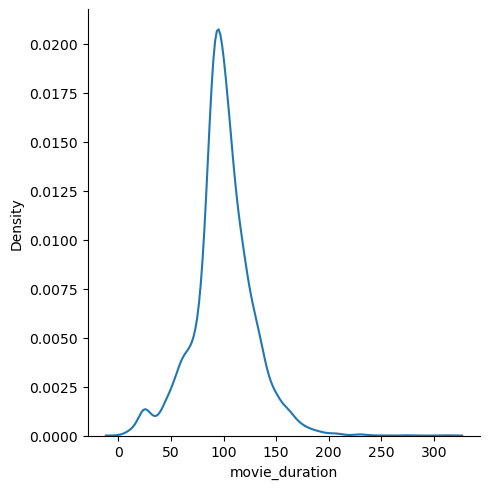

In [226]:
sns.displot(data = data[data["type"] == "Movie"], x = "movie_duration", kind = "kde")
plt.show()

In [227]:
data[data["type"] == "Movie"]["movie_duration"].describe()

count    6131.000000
mean       99.577187
std        28.283670
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: movie_duration, dtype: float64

## &#128373;&#8205;&#9792; On average, movies on Netflix have a duration of 99 minutes. Approximately 75% of movies have a duration below 114 minutes. The kernel density estimate (KDE) plot is narrow, indicating a low deviation from the mean.

In [228]:
def draw_countplot(data, fontsize = 10, rotation = 0 , ha = "center"):
    sns.countplot(data, order=data.unique(), palette=np.random.choice(colors, 11))
    
    for i, item in enumerate(data.unique()):
        a = round((sum(data == item)/len(data)) * 100 , 2)
        plt.text(x = i, y = sum(data == item), s = f"{a}%", ha = ha , fontsize = fontsize, rotation = rotation)
    plt.xticks(rotation = 45, ha = "right")
    plt.show()

## 2.2 Type

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


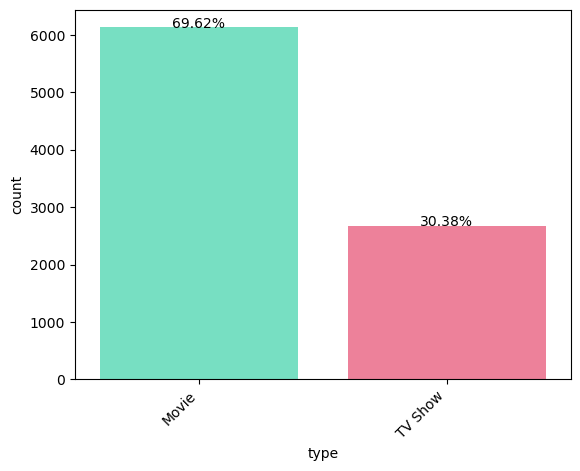

In [229]:
draw_countplot(data["type"])

## &#128373;&#8205;&#9792; Approximately One-third of the total content available on Netflix consists of TV shows, while the remaining two-thirds are movies.

## 2.3 Country

In [230]:
country = pd.DataFrame(data["country"].value_counts(ascending=False)[:10])

In [231]:
country.loc["Others"] = len(data)  - country["country"].sum()

In [232]:
country

,country
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110
Egypt,106


## The content on Netflix is coming on from a larne number of countires. So it wont be possible to analyse all of them.So we will be analysing the top 10 countires from where maximum contents aare coming only

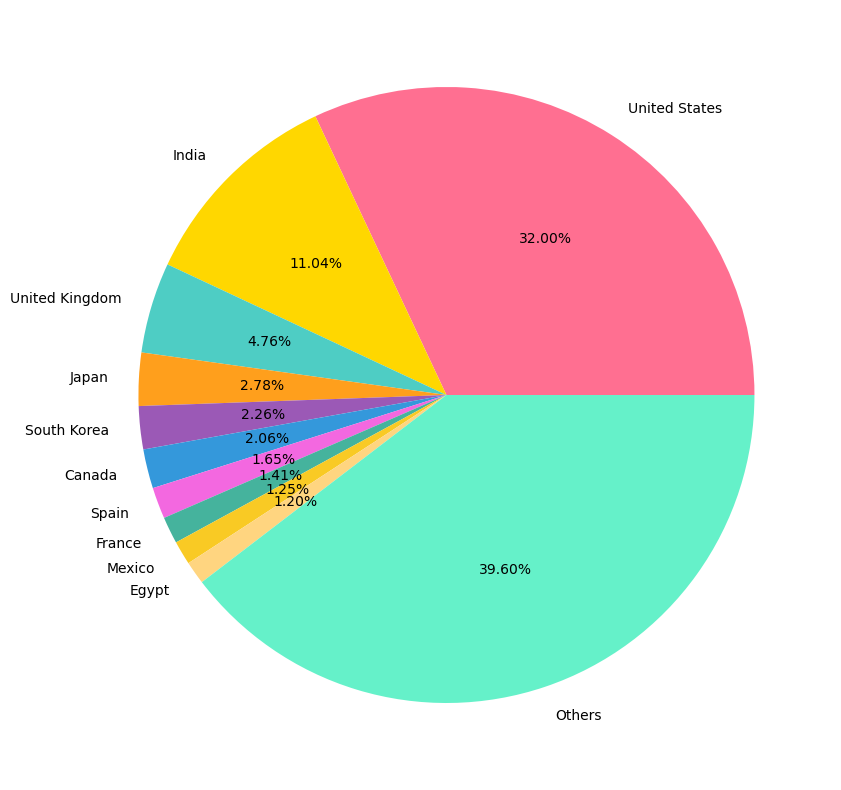

In [233]:
plt.figure(figsize=(10, 10))
plt.pie(x = country["country"], labels = country.index, autopct="%1.2f%%", colors=colors)
plt.show()

## &#128373;&#8205;&#9792; The analysis reveals that the United States and India are the primary contributors of Netflix content, with the USA accounting for 32% of the content and India contributing 11% of the total content available on the platform.

# 2.4 rating

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


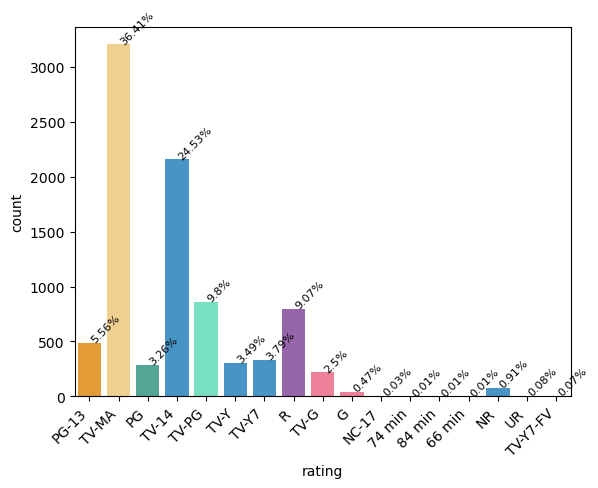

In [234]:
draw_countplot(data["rating"], fontsize=8, rotation = 45, ha = "left")

## The maximum content on netflix are rated as TV-MA. Also TV-14 account for the large number. Lets understand the meaning of these content rating.

In [235]:
data["For Counting"] = 1

In [236]:
content_ratings = pd.DataFrame({"rating" : [key for key in content_ratings.keys()],
"meaning" : [value for value in content_ratings.values()]})

In [237]:
rating_summary = data.pivot_table(index = "rating",values = "For Counting" , aggfunc=sum )

In [238]:
pd.set_option('display.max_colwidth', None)
rating_summary = pd.merge(rating_summary, content_ratings, on = "rating", how = "left")

In [239]:
rating_summary.sort_values(by = "For Counting", ascending=False)

,rating,For Counting,meaning
11,TV-MA,3207,Mature Audience Only – This program is specifically designed to be viewed by adults and may be unsuitable for children under 17
9,TV-14,2160,Parents Strongly Cautioned – Some material may be inappropriate for children under 14
12,TV-PG,863,Parental Guidance Suggested – Some material may not be suitable for children
8,R,799,Restricted – Restricted to viewers over the age of 17
7,PG-13,490,Parents Strongly Cautioned – Some material may be inappropriate for children under 13
14,TV-Y7,334,Directed to Older Children – This program is designed for children age 7 and above
13,TV-Y,307,All Children – This program is designed to be appropriate for all children
6,PG,287,Parental Guidance Suggested – Some material may not be suitable for children
10,TV-G,220,General Audience – This program is suitable for all ages
5,NR,80,Not Rated – The content rating is not specified


## &#128373;&#8205;&#9792; It is evident that Netflix is placing emphasis on content tailored for mature audiences. Roughly 87% of its content is not appropriate for children under the age of 13.

## 2.5 listing (genres)

In [240]:
listed_in = list()
year_added = list()
for strings, year in zip(data["listed_in"], data["year added"]):
    temp = [i.strip() for i in strings.split(",")]
    listed_in.extend(temp)
    year_added.extend([year for _ in range(len(temp))])
    

In [241]:
len(listed_in)

19323

In [242]:
len(year_added)

19323

In [243]:
year_genre = pd.DataFrame({
    "genre" : listed_in,
    "year added" : year_added,
    "for count" : [1 for _ in range(len(year_added))]
})

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


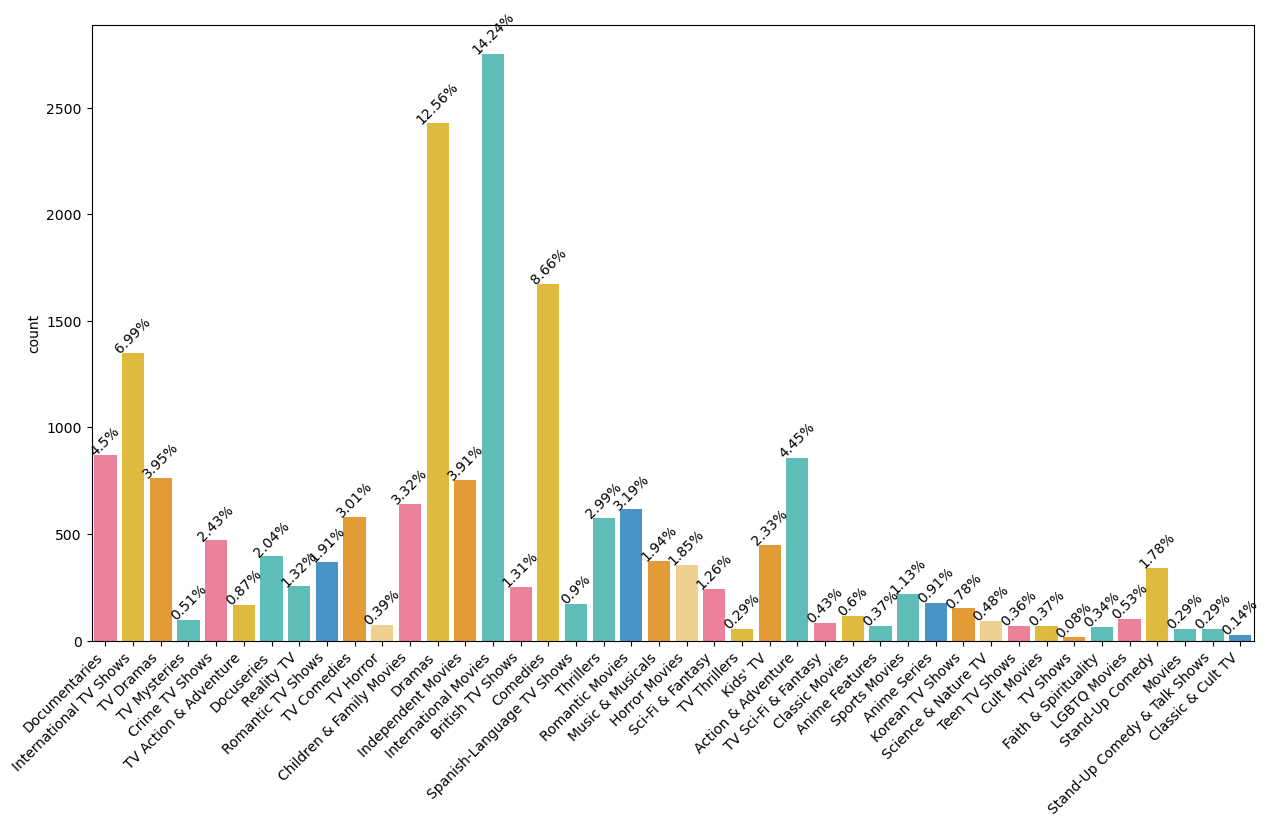

In [244]:
plt.figure(figsize=(15, 8))
draw_countplot(pd.Series(listed_in), ha = "center", rotation = 45)

## &#128373;&#8205;&#9792; The percentages provided in the analysis can be a little misleading as they do not represent percentage of the overall content on Netflix. For example, International TV Shows make up only 6.99% of the total listings and not total content. However, the analysis reveals that International TV Shows, Dramas, International Movies and , Comedies are the most popular genres of content on Netflix.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


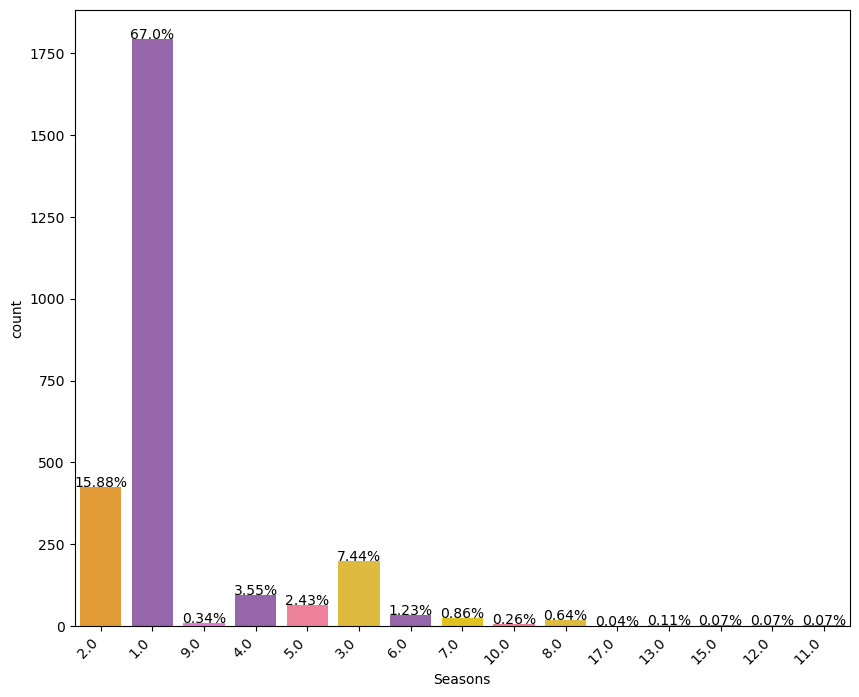

In [245]:
plt.figure(figsize=(10, 8))
draw_countplot(data[data["type"] == "TV Show"]["Seasons"], rotation = 0, ha = "center")

## &#128373;&#8205;&#9792; The majority of TV shows, comprising approximately 67%, consist of just one season. However, there are some exceptional shows that have surpassed the five-season mark, with a few even reaching 17 seasons.

# 2.6 Time Series Analysis

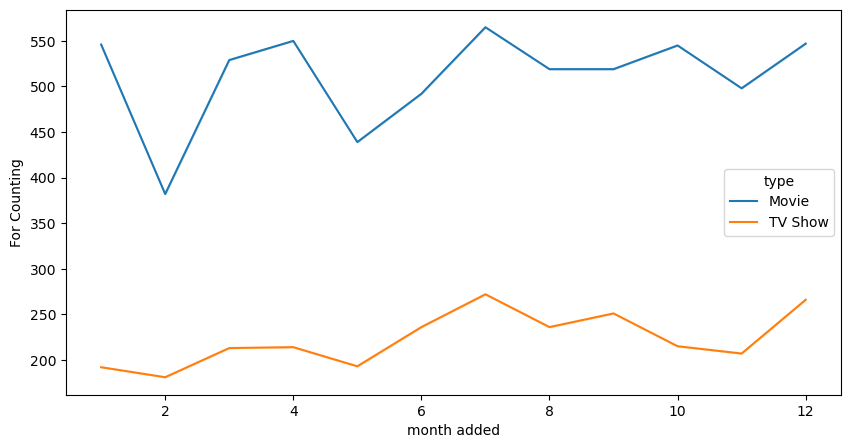

In [246]:
plt.figure(figsize=(10, 5))
sns.lineplot(data= data, x = "month added", y = "For Counting", estimator = sum, hue = "type")
plt.xticks()
plt.show()

## &#128373;&#8205;&#9792; The majority of shows on Netflix are typically added between the months of June and January. However, fewer shows tend to be added during the months of February and May.

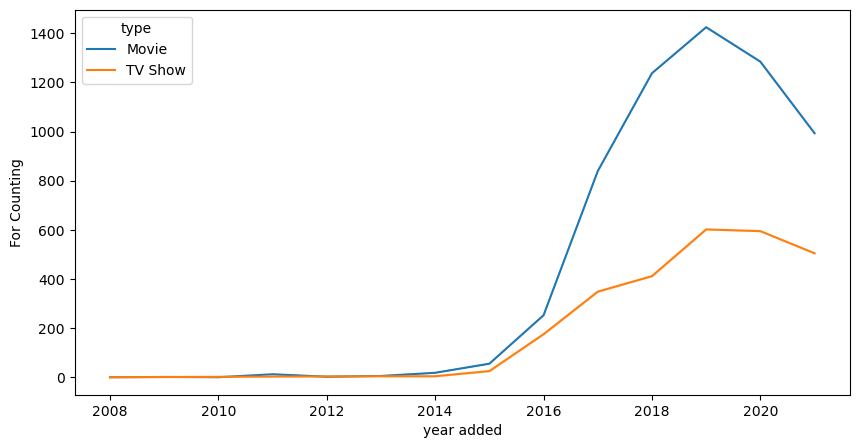

In [247]:
plt.figure(figsize=(10, 5))
sns.lineplot(data= data, x = "year added", y = "For Counting", estimator = sum, hue = "type")
plt.xticks()
plt.show()

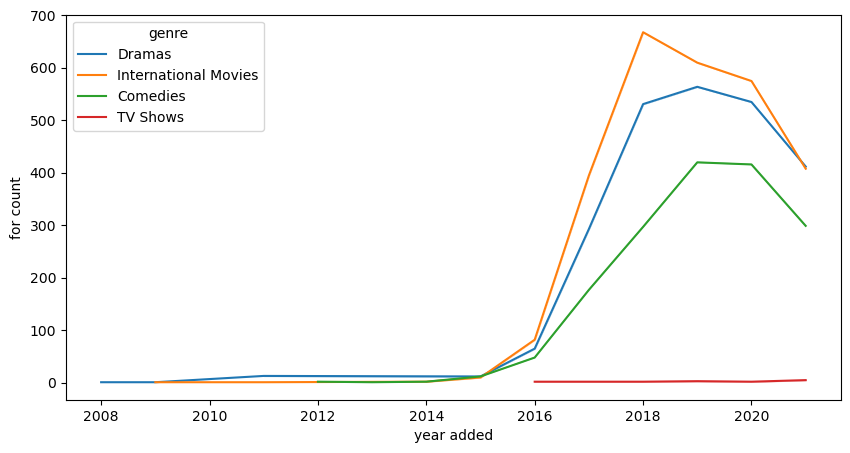

In [248]:
plt.figure(figsize=(10, 5))
sns.lineplot(data= year_genre[year_genre["genre"].isin(["TV Shows", "Dramas", "International Movies", "Comedies"])], x = "year added", y = "for count", estimator = sum, hue = "genre")
plt.xticks()
plt.show()

## &#128373;&#8205;&#9792; Since 2015, Netflix has been consistently increasing the amount of content it adds to its platform. However, in more recent times, particularly after 2019, there has been a noticeable decline in the annual count of content additions. Upon closer analysis of the top four genres, a similar pattern emerges, indicating a decrease in content additions.

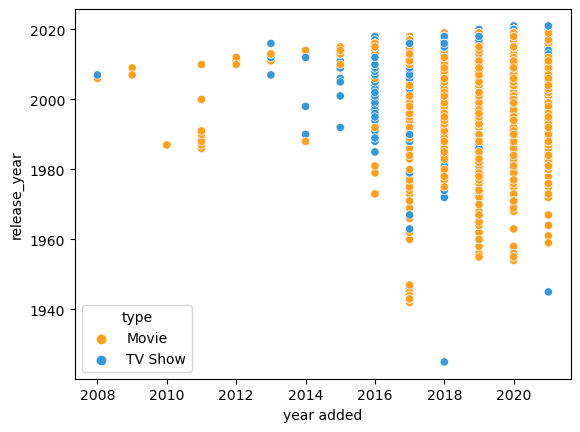

In [249]:
sns.scatterplot(data = data, x = "year added", y = "release_year", palette=  list(np.random.choice(colors, len(data["type"].unique()))), hue = "type")
plt.show()

## &#128373;&#8205;&#9792; Netflix focues on adding new content and featuring previously released content. Thus they provide a diverse range of options to its subscribers, including fresh releases as well as popular titles from the past. 